In [25]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt




In [26]:
df = pd.read_csv("../data/student-mat.csv"  , sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [27]:
df.shape


(395, 33)

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [29]:
df.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [30]:
df["G3"].describe()


count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

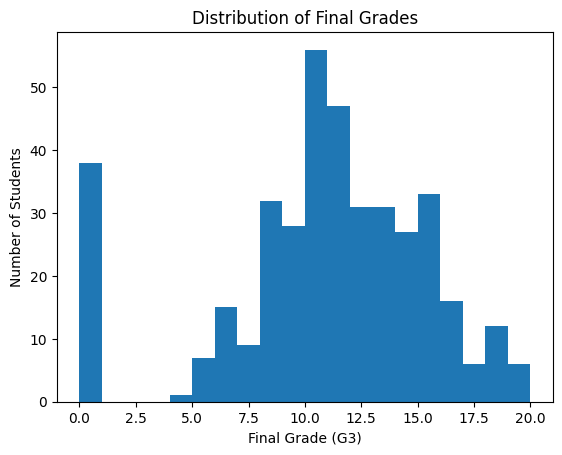

In [31]:

plt.hist(df["G3"], bins=20)
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades")
plt.show()


In [38]:
# preprocessing data 
df_mat = pd.read_csv("../data/student-mat.csv", sep=";")


def classify_grade(g):
    if g < 8:
        return "At Risk"
    elif g < 14:
        return "Average"
    else:
        return "High Performer"

df_mat["risk_level"] = df_mat["G3"].apply(classify_grade)


X_mat = df_mat.drop(["G3", "risk_level"], axis=1)
y_mat = df_mat["risk_level"]


X_mat = pd.get_dummies(X_mat, drop_first=True)


processed_mat = pd.concat([X_mat, y_mat], axis=1)


processed_mat.to_csv("../data-cleaned/processed_student_mat.csv", index=False)

processed_mat


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,risk_level
0,18,4,4,2,2,0,4,3,4,1,...,False,True,False,False,False,True,True,False,False,At Risk
1,17,1,1,1,2,0,5,3,3,1,...,False,False,True,False,False,False,True,True,False,At Risk
2,15,1,1,1,2,3,4,3,2,2,...,False,True,False,True,False,True,True,True,False,Average
3,15,4,2,1,3,0,3,2,2,1,...,False,False,True,True,True,True,True,True,True,High Performer
4,16,3,3,1,2,0,4,3,2,1,...,False,False,True,True,False,True,True,False,False,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,True,False,True,True,False,True,True,False,False,Average
391,17,3,1,2,1,0,2,4,5,3,...,False,False,False,False,False,False,True,True,False,High Performer
392,21,1,1,1,1,3,5,5,3,3,...,True,False,False,False,False,False,True,False,False,At Risk
393,18,3,2,3,1,0,4,4,1,3,...,False,False,False,False,False,False,True,True,False,Average


In [37]:
df_por = pd.read_csv("../data/student-por.csv", sep=";")

df_por["risk_level"] = df_por["G3"].apply(classify_grade)

X_por = df_por.drop(["G3", "risk_level"], axis=1)
y_por = df_por["risk_level"]

X_por = pd.get_dummies(X_por, drop_first=True)

processed_por = pd.concat([X_por, y_por], axis=1)

processed_por.to_csv("../data-cleaned/processed_student_por.csv", index=False)

processed_por


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,risk_level
0,18,4,4,2,2,0,4,3,4,1,...,False,True,False,False,False,True,True,False,False,Average
1,17,1,1,1,2,0,5,3,3,1,...,False,False,True,False,False,False,True,True,False,Average
2,15,1,1,1,2,0,4,3,2,2,...,False,True,False,False,False,True,True,True,False,Average
3,15,4,2,1,3,0,3,2,2,1,...,False,False,True,False,True,True,True,True,True,High Performer
4,16,3,3,1,2,0,4,3,2,1,...,False,False,True,False,False,True,True,False,False,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,False,False,False,False,True,False,True,True,False,Average
645,18,3,1,1,2,0,4,3,4,1,...,False,False,True,False,False,True,True,True,False,High Performer
646,18,1,1,2,2,0,1,1,1,1,...,False,False,False,False,True,True,True,False,False,Average
647,17,3,1,2,1,0,2,4,5,3,...,False,False,False,False,False,False,True,True,False,Average


In [39]:
df_kaggle = pd.read_csv("../data/StudentsPerformance.csv")

# Create average score
df_kaggle["avg_score"] = (
    df_kaggle["math score"] +
    df_kaggle["reading score"] +
    df_kaggle["writing score"]
) / 3

# Create risk_level
def classify_avg(g):
    if g < 40:
        return "At Risk"
    elif g < 70:
        return "Average"
    else:
        return "High Performer"

df_kaggle["risk_level"] = df_kaggle["avg_score"].apply(classify_avg)

# Drop original score columns if you want pure prediction
X_kaggle = df_kaggle.drop(
    ["math score", "reading score", "writing score",
     "avg_score", "risk_level"],
    axis=1
)

y_kaggle = df_kaggle["risk_level"]

X_kaggle = pd.get_dummies(X_kaggle, drop_first=True)

processed_kaggle = pd.concat([X_kaggle, y_kaggle], axis=1)

processed_kaggle.to_csv("../data-cleaned/processed_kaggle_students.csv", index=False)

processed_kaggle


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,risk_level
0,False,True,False,False,False,True,False,False,False,False,True,True,High Performer
1,False,False,True,False,False,False,False,False,True,False,True,False,High Performer
2,False,True,False,False,False,False,False,True,False,False,True,True,High Performer
3,True,False,False,False,False,False,False,False,False,False,False,True,Average
4,True,False,True,False,False,False,False,False,True,False,True,True,High Performer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,True,False,False,True,False,High Performer
996,True,False,True,False,False,False,True,False,False,False,False,True,Average
997,False,False,True,False,False,False,True,False,False,False,False,False,Average
998,False,False,False,True,False,False,False,False,True,False,True,False,High Performer
